<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/Analise_Resultado_1Turno_Eleicoes_Municipais_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

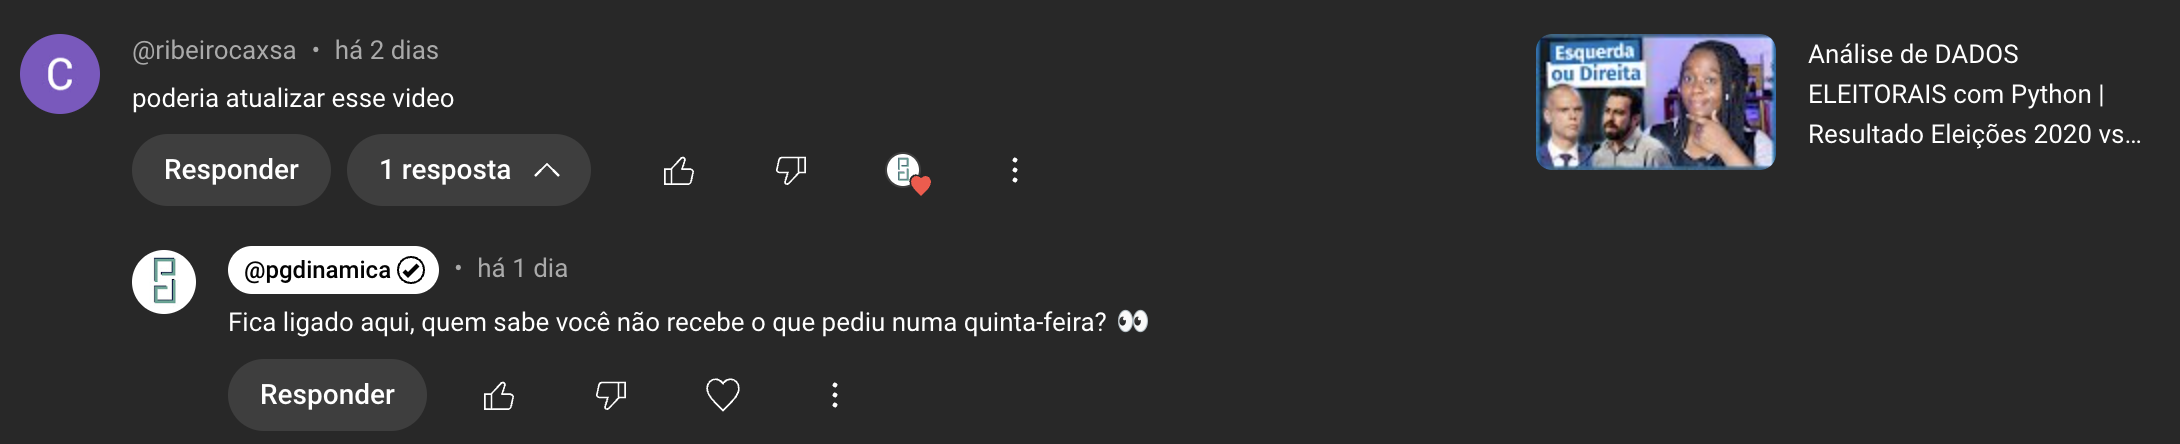

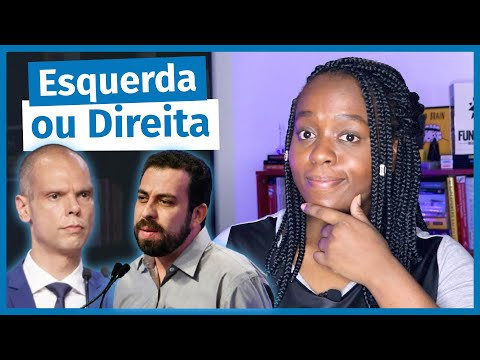

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZZMEUFyKqpE', width=640, height=360)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Os arquivos utilizados na análise a seguir estão disponíveis nos links:
1. [Repositório de Dados Eleitorais](https://www.tse.jus.br/hotsites/pesquisas-eleitorais/resultados.html)
2. [Partidos 2020 e 2024](https://github.com/programacaodinamica/analise-dados/blob/master/dados)
3. [Brasil ShapeFile IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html)
4. [Resultado Eleicoes 2024 UOL](https://noticias.uol.com.br/eleicoes/2024/apuracao/)
5.[prefeitos_mais_votados_1turno_2020.csv](https://github.com/programacaodinamica/analise-dados/blob/master/dados/prefeitos_mais_votados_1turno_2020.csv)
6.[municipios_brasileiros_tse.csv](https://github.com/programacaodinamica/analise-dados/blob/master/dados/municipios_brasileiros_tse.csv)

In [3]:
!pip install -U plotly

In [4]:
!pip install geopandas

In [5]:
#Importando pacotes necessários
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
#Caminho para os arquivos utilizados
pasta_eleicoes = '/content/drive/MyDrive/Colab Datasets/eleicoes/'
arquivo_partidos = os.path.join(pasta_eleicoes,'partidos2024.csv')
arquivo_prefeitos_mais_votados_1turno_2020 = os.path.join(pasta_eleicoes,'prefeitos_mais_votados_1turno_2020.csv')
arquivo_resultado_2024_html = os.path.join(pasta_eleicoes,'eleicao-2024.html')
arquivo_capitais = os.path.join(pasta_eleicoes,'eleica2024-capitais.csv')
arquivo_municipios_tse = os.path.join(pasta_eleicoes,'municipios_brasileiros_tse.csv')
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Colab Datasets/MC01/BR_Municipios/BR_Municipios_2019.shp'
arquivo_BR_estados_shapefile = os.path.join(pasta_eleicoes,'BR_UF_2022/BR_UF_2022.shp')

In [7]:
#alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

## Quem venceu mais: Esquerda ou Direita?

In [8]:
candidatos_mais_votados_2020 = pd.read_csv(arquivo_prefeitos_mais_votados_1turno_2020)

In [9]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)

In [10]:
candidatos_mais_votados_2020['Espectro'] = candidatos_mais_votados_2020['Espectro'].astype(espec_type)

In [11]:
candidatos_mais_votados_2020.head()

NM_URNA_CANDIDATO           NM_MUNICIPIO  CD_MUNICIPIO DS_SIT_TOT_TURNO  \
0       BRUNO COVAS              SÃO PAULO         71072         2º TURNO   
1       PAULO SERRA            SANTO ANDRÉ         70572           ELEITO   
2   ORLANDO MORANDO  SÃO BERNARDO DO CAMPO         70750           ELEITO   
3           FELICIO    SÃO JOSÉ DOS CAMPOS         70998           ELEITO   
4       ALVARO DIAS                  NATAL         17612           ELEITO   

   NR_PARTIDO SG_PARTIDO  QT_VOTOS_NOMINAIS Espectro  
0          45       PSDB            1754013   centro  
1          45       PSDB             266591   centro  
2          45       PSDB             261761   centro  
3          45       PSDB             204800   centro  
4          45       PSDB             194764   centro

In [12]:
municipios_geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)
municipios_geo_df['NM_MUN'] = municipios_geo_df['NM_MUN'].str.upper()

In [13]:
candidatos_mais_votados_2020_geo_df = municipios_geo_df.merge(candidatos_mais_votados_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Prefeitos Mais Votados por Município (2020)'}>

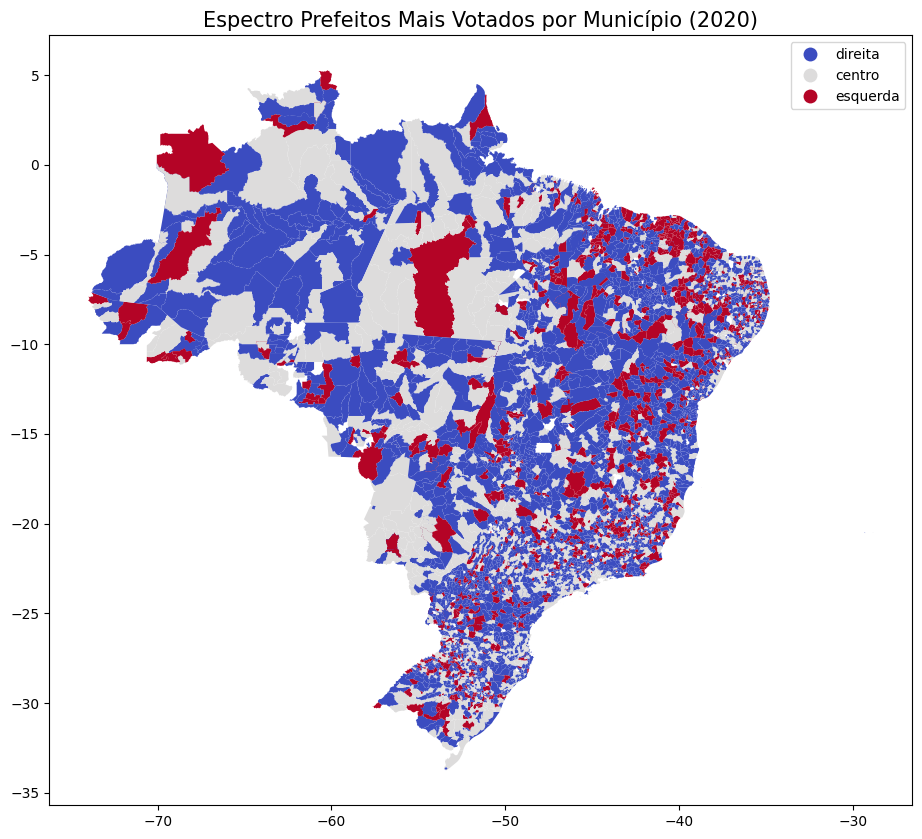

In [14]:
fig, ax = plt.subplots(1,1,figsize=(28,10))
ax.set_title(f'Espectro Prefeitos Mais Votados por Município (2020)',  size=15)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax)

In [15]:
candidatos_mais_votados_2020_geo_df.Espectro.value_counts().plot(kind='bar',title=f'Prefeitos por Espectro Município (2020)')

#Comparando resultado das capitais em 2020 vs. 2024

## Resultado 2024

https://noticias.uol.com.br/eleicoes/2024/apuracao/

In [16]:
from bs4 import BeautifulSoup

In [17]:
# Carrega o arquivo HTML
with open(arquivo_resultado_2024_html, "r", encoding="utf-8") as file:
    html_content = file.read()

# Faz o parsing do HTML com BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

In [18]:
# Extrair todas as divs da classe específica
divs = soup.find_all('div', class_='card-election')
#for div in divs:
    #print(div)

In [19]:
cities = soup.find_all('p', class_='city my-0 no-link bold-text')
states = soup.find_all('p', class_='acronym regular-caption pl-50 my-0')
candidates = soup.find_all('p', class_='m-0 regular-text')
parties = soup.find_all('p', class_='avatar-description regular-smaller-text')
results_percent = soup.find_all('div', class_='result-item result-subtext with-values regular-text')
results_votes = soup.find_all('div', class_='result-item regular-caption result-caption')

In [20]:
# Inicializa listas para armazenar os dados
municipios = []
estados = []
candidatos = []
partidos = []
votos_totais = []
votos_percentuais = []

In [21]:
for candidate in candidates:
    candidatos.append(candidate.text)

for party in parties:
    partidos.append(party.text)

for city in cities:
    municipios.append(city.text)
    municipios.append(city.text)

for state in states:
    estados.append(state.text)
    estados.append(state.text)

for result in results_percent:
    votos_percentuais.append(result.text)

for result in results_votes:
    votos_totais.append(result.text)

In [22]:
data = {
    'Municipio': municipios,
    'Estado': estados,
    'Candidato': candidatos,
    'Partido': partidos,
    'Votos-Totais': votos_totais,
    'Votos-Percentuais': votos_percentuais
}

resultado_2024 = pd.DataFrame(data)

In [23]:
resultado_2024

Municipio Estado            Candidato Partido Votos-Totais  \
0    Vitória da Conquista     BA        Sheila Lemos    UNIÃO      116.488   
1    Vitória da Conquista     BA            Waldenor       PT       52.947   
2               São Paulo     SP       Ricardo Nunes      MDB    1.801.139   
3               São Paulo     SP    Guilherme Boulos     PSOL    1.776.127   
4          Belo Horizonte     MG        Bruno Engler       PL      435.853   
..                    ...    ...                  ...     ...          ...   
201         Foz do Iguaçu     PR    Paulo Mac Donald       PP       47.775   
202                  Magé     RJ   Renato Cozzolino E      PP      125.902   
203                  Magé     RJ    Ricardo da Karol       PL       12.146   
204           Parauapebas     PA     Aurélio Goiano E  AVANTE       92.073   
205           Parauapebas     PA      Rafael Ribeiro    UNIÃO       44.862   

    Votos-Percentuais  
0              58,83%  
1              26,74%  
2              29,48%  
3              29,07%  
4              34,38%  
..                ...  
201            32,58%  
202            88,74%  
203             8,56%  
204            58,52%  
205            28,51%  

[206 rows x 6 columns]

In [24]:
resultado_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Municipio          206 non-null    object
 1   Estado             206 non-null    object
 2   Candidato          206 non-null    object
 3   Partido            206 non-null    object
 4   Votos-Totais       206 non-null    object
 5   Votos-Percentuais  206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [25]:
resultado_2024['Votos-Percentuais'] = resultado_2024['Votos-Percentuais'].str.replace('%','')
resultado_2024['Votos-Percentuais'] = resultado_2024['Votos-Percentuais'].str.replace(',','.').astype(float)
resultado_2024['Votos-Totais'] = resultado_2024['Votos-Totais'].str.replace('.','').astype(int)

In [26]:
resultado_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Municipio          206 non-null    object 
 1   Estado             206 non-null    object 
 2   Candidato          206 non-null    object 
 3   Partido            206 non-null    object 
 4   Votos-Totais       206 non-null    int64  
 5   Votos-Percentuais  206 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [27]:
resultado_2024.head()

Municipio Estado           Candidato Partido  Votos-Totais  \
0  Vitória da Conquista     BA       Sheila Lemos    UNIÃO        116488   
1  Vitória da Conquista     BA           Waldenor       PT         52947   
2             São Paulo     SP      Ricardo Nunes      MDB       1801139   
3             São Paulo     SP   Guilherme Boulos     PSOL       1776127   
4        Belo Horizonte     MG       Bruno Engler       PL        435853   

   Votos-Percentuais  
0              58.83  
1              26.74  
2              29.48  
3              29.07  
4              34.38

In [28]:
partidos_df = pd.read_csv(arquivo_partidos, sep=';')
partidos_df['Espectro'] = partidos_df ['Espectro'].astype(espec_type)

In [29]:
partidos_df.head()

Espectro SG_PARTIDO_TR SG_PARTIDO  NR_PARTIDO
0   centro        AVANTE     AVANTE          70
1  direita            DC         DC          27
2  direita           DEM        DEM          25
3   centro           MDB        MDB          15
4  direita          NOVO       NOVO          30

In [30]:
resultado_2024 = resultado_2024.\
merge(partidos_df, left_on='Partido', right_on='SG_PARTIDO')[['Municipio', 'Estado', 'Candidato', 'Partido', 'Votos-Totais',
       'Votos-Percentuais', 'Espectro','NR_PARTIDO']]

In [31]:
resultado_2024.head()

Municipio Estado           Candidato Partido  Votos-Totais  \
0  Vitória da Conquista     BA       Sheila Lemos    UNIÃO        116488   
1  Vitória da Conquista     BA           Waldenor       PT         52947   
2             São Paulo     SP      Ricardo Nunes      MDB       1801139   
3             São Paulo     SP   Guilherme Boulos     PSOL       1776127   
4        Belo Horizonte     MG       Bruno Engler       PL        435853   

   Votos-Percentuais  Espectro  NR_PARTIDO  
0              58.83   direita          44  
1              26.74  esquerda          13  
2              29.48    centro          15  
3              29.07  esquerda          50  
4              34.38   direita          22

In [32]:
capitais = pd.read_csv(arquivo_capitais)

In [33]:
capitais.head()

Municipio Estado  Capital
0  Vitória da Conquista     BA        0
1             São Paulo     SP        1
2        Belo Horizonte     MG        1
3             Fortaleza     CE        1
4                Manaus     AM        1

In [34]:
resultado_2024 = resultado_2024.\
merge(capitais[['Municipio','Capital']], on='Municipio')

In [35]:
resultado_2024.head()

Municipio Estado           Candidato Partido  Votos-Totais  \
0  Vitória da Conquista     BA       Sheila Lemos    UNIÃO        116488   
1  Vitória da Conquista     BA           Waldenor       PT         52947   
2             São Paulo     SP      Ricardo Nunes      MDB       1801139   
3             São Paulo     SP   Guilherme Boulos     PSOL       1776127   
4        Belo Horizonte     MG       Bruno Engler       PL        435853   

   Votos-Percentuais  Espectro  NR_PARTIDO  Capital  
0              58.83   direita          44        0  
1              26.74  esquerda          13        0  
2              29.48    centro          15        1  
3              29.07  esquerda          50        1  
4              34.38   direita          22        1

In [37]:
resultado_capitais_2024 = resultado_2024[resultado_2024['Capital'] == 1]

# Para cada combinação de 'Municipio' e 'Estado', encontra o índice da linha com o maior número de 'Votos-Totais'
idx = resultado_capitais_2024 .groupby(['Municipio', 'Estado'])['Votos-Totais'].idxmax()

# Usa os índices para filtrar o DataFrame original e obter todas as colunas
candidatos_mais_votados_capitais_2024 = resultado_capitais_2024.loc[idx].sort_values(by='Votos-Totais', ascending=False).reset_index(drop=True)

In [38]:
candidatos_mais_votados_capitais_2024

Municipio Estado                   Candidato       Partido  \
0    Rio de Janeiro     RJ       Eduardo Paes Reeleito           PSD   
1         São Paulo     SP              Ricardo Nunes            MDB   
2          Salvador     BA         Bruno Reis Reeleito         UNIÃO   
3            Recife     PE        João Campos Reeleito           PSB   
4         Fortaleza     CE            André Fernandes             PL   
5    Belo Horizonte     MG               Bruno Engler             PL   
6          São Luís     MA     Eduardo Braide Reeleito           PSD   
7       São Gonçalo     RJ     Capitão Nelson Reeleito            PL   
8            Maceió     AL                JHC Reeleito            PL   
9             Belém     PA                       Igor            MDB   
10         Campinas     SP        Dário Saadi Reeleito  REPUBLICANOS   
11           Manaus     AM              David Almeida         AVANTE   
12     Porto Alegre     RS             Sebastião Melo            MDB   
13         Curitiba     PR           Eduardo Pimentel            PSD   
14  Duque de Caxias     RJ              Netinho Reis E           MDB   
15         Teresina     PI             Silvio Mendes E         UNIÃO   
16          Goiânia     GO             Fred Rodrigues             PL   
17      João Pessoa     PB              Cicero Lucena             PP   
18           Macapá     AP          Dr Furlan Reeleito           MDB   
19            Natal     RN            Paulinho Freire          UNIÃO   
20    Florianópolis     SC            Topázio Reeleito           PSD   
21     Campo Grande     MS              Adriane Lopes             PP   
22        Boa Vista     RR    Arthur Henrique Reeleito           MDB   
23           Cuiabá     MT                     Abilio             PL   
24          Aracaju     SE              Emilia Correa             PL   
25      Porto Velho     RO           Mariana Carvalho          UNIÃO   
26       Rio Branco     AC       Tião Bocalom Reeleito            PL   
27          Vitória     ES   Lorenzo Pazolini Reeleito  REPUBLICANOS   
28         Blumenau     SC           Delegado Egidio E            PL   
29           Palmas     TO              Janad Valcari             PL   

    Votos-Totais  Votos-Percentuais  Espectro  NR_PARTIDO  Capital  
0        1861856              60.47   direita          55        1  
1        1801139              29.48    centro          15        1  
2        1045690              78.67   direita          44        1  
3         725721              78.11  esquerda          40        1  
4         562305              40.20   direita          22        1  
5         435853              34.38   direita          22        1  
6         403981              70.12   direita          55        1  
7         387914              84.49   direita          22        1  
8         379544              83.25   direita          22        1  
9         359904              44.89    centro          15        1  
10        355800              66.77   direita          10        1  
11        354596              32.16    centro          70        1  
12        345420              49.72    centro          15        1  
13        313347              33.51   direita          55        1  
14        243850              54.08    centro          15        1  
15        239848              52.19   direita          44        1  
16        214253              31.14   direita          22        1  
17        205122              49.16   direita          11        1  
18        204291              85.08    centro          15        1  
19        171146              44.08   direita          44        1  
20        161839              58.49   direita          55        1  
21        140913              31.67   direita          11        1  
22        133180              75.18    centro          15        1  
23        126944              39.61   direita          22        1  
24        126365              41.62   direita       

In [39]:
estados_geo_df = gpd.read_file(arquivo_BR_estados_shapefile)

In [41]:
estados_geo_df

CD_UF                NM_UF SIGLA_UF       NM_REGIAO     AREA_KM2  \
0     12                 Acre       AC           Norte   164173.429   
1     13             Amazonas       AM           Norte  1559255.881   
2     15                 Pará       PA           Norte  1245870.704   
3     16                Amapá       AP           Norte   142470.762   
4     17            Tocantins       TO           Norte   277423.627   
5     21             Maranhão       MA      Nordeste\n   329651.496   
6     22                Piauí       PI      Nordeste\n   251755.481   
7     23                Ceará       CE      Nordeste\n   148894.447   
8     24  Rio Grande do Norte       RN      Nordeste\n    52809.599   
9     25              Paraíba       PB      Nordeste\n    56467.242   
10    26           Pernambuco       PE      Nordeste\n    98067.877   
11    27              Alagoas       AL      Nordeste\n    27830.661   
12    28              Sergipe       SE      Nordeste\n    21938.188   
13    29                Bahia       BA      Nordeste\n   564760.429   
14    31         Minas Gerais       MG       Sudeste\n   586513.983   
15    32       Espírito Santo       ES       Sudeste\n    46074.448   
16    33       Rio de Janeiro       RJ       Sudeste\n    43750.425   
17    35            São Paulo       SP       Sudeste\n   248219.485   
18    41               Paraná       PR           Sul\n   199298.981   
19    42       Santa Catarina       SC           Sul\n    95730.690   
20    43    Rio Grande do Sul       RS           Sul\n   281707.151   
21    50   Mato Grosso do Sul       MS  Centro-oeste\n   357142.082   
22    51          Mato Grosso       MT  Centro-oeste\n   903208.361   
23    52                Goiás       GO  Centro-oeste\n   340242.859   
24    53     Distrito Federal       DF  Centro-oeste\n     5760.784   
25    11             Rondônia       RO           Norte   237754.172   
26    14              Roraima       RR           Norte   223644.530   

                                             geometry  
0   POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...  
1   POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...  
2   MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...  
3   MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...  
4   POLYGON ((-48.2483 -13.19239, -48.24844 -13.19...  
5   MULTIPOLYGON (((-44.5868 -2.23341, -44.58696 -...  
6   POLYGON ((-42.47034 -3.48377, -42.46126 -3.484...  
7   POLYGON ((-37.87162 -4.3664, -37.87109 -4.3670...  
8   MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ...  
9   MULTIPOLYGON (((-34.7958 -7.175, -34.79578 -7....  
10  MULTIPOLYGON (((-35.04823 -8.60936, -35.04756 ...  
11  MULTIPOLYGON (((-35.287 -9.14489, -35.28699 -9...  
12  MULTIPOLYGON (((-37.01203 -10.92784, -37.01267...  
13  MULTIPOLYGON (((-39.26447 -8.61413, -39.26341 ...  
14  POLYGON ((-42.51148 -14.98627, -42.50964 -14.9...  
15  MULTIPOLYGON (((-40.27883 -20.33437, -40.27883...  
16  MULTIPOLYGON (((-42.00612 -22.88563, -42.00634...  
17  MULTIPOLYGON (((-46.47312 -22.70498, -46.47289...  
18  MULTIPOLYGON (((-48.30974 -25.49328, -48.27691...  
19  MULTIPOLYGON (((-49.23653 -26.03711, -49.2365 ...  
20  MULTIPOLYGON (((-51.71873 -31.85463, -51.71941...  
21  POLYGON ((-54.68379 -23.8305, -54.68569 -23.83...  
22  POLYGON ((-56.0716 -17.17062, -56.07246 -17.17...  
23  POLYGON ((-47.33502 -15.58733, -47.33512 -15.5...  
24  POLYGON ((-48.01472 -16.04996, -48.01573 -16.0...  
25  POLYGON ((-62.60021 -13.01675, -62.59999 -13.0...  
26  POLYGON ((-60.12972 4.50843, -60.1296 4.50826,...

<Axes: >

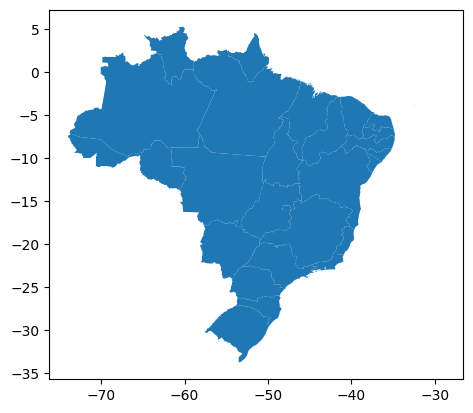

In [40]:
estados_geo_df.plot()

In [42]:
candidatos_mais_votados_capitais_2024_geo_df = estados_geo_df.merge(candidatos_mais_votados_capitais_2024 , left_on='SIGLA_UF', right_on='Estado')

<Axes: title={'center': 'Espectro do Prefeito mais votado da capital da UF (2024)'}>

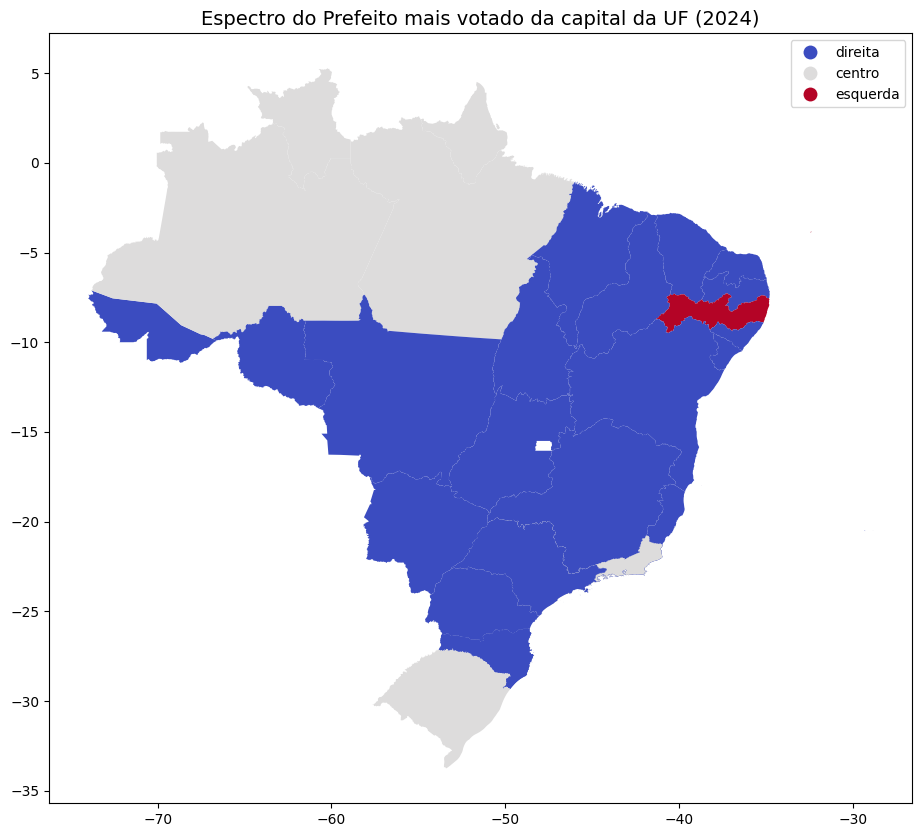

In [43]:
fig, ax = plt.subplots(1,1,figsize=(28,10))
ax.set_title(f'Espectro do Prefeito mais votado da capital da UF (2024)',size=14)

candidatos_mais_votados_capitais_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax)

In [44]:
candidatos_mais_votados_capitais_2024_geo_df.Espectro.value_counts().plot(kind='bar',title=f'Prefeitos de Capitais por Espectro Município (2024)')

## Resultado 2020

In [45]:
municipios_tse_df = pd.read_csv(arquivo_municipios_tse)

In [46]:
municipios_tse_df

codigo_tse  uf nome_municipio  capital  codigo_ibge
0           1120  AC     ACRELÂNDIA        0      1200013
1           1570  AC   ASSIS BRASIL        0      1200054
2           1058  AC      BRASILÉIA        0      1200104
3           1007  AC         BUJARI        0      1200138
4           1015  AC       CAPIXABA        0      1200179
...          ...  ..            ...      ...          ...
5565       96199  TO     TOCANTÍNIA        0      1721109
5566       73458  TO       TUPIRAMA        0      1721257
5567       73237  TO     TUPIRATINS        0      1721307
5568       96652  TO   WANDERLÂNDIA        0      1722081
5569       96431  TO        XAMBIOÁ        0      1722107

[5570 rows x 5 columns]

In [47]:
candidatos_mais_votados_1turno_2020 = candidatos_mais_votados_2020.merge(municipios_tse_df, left_on='CD_MUNICIPIO', right_on='codigo_tse')

In [48]:
candidatos_mais_votados_capitais_1turno_2020 = candidatos_mais_votados_1turno_2020[candidatos_mais_votados_1turno_2020 ['capital']==1]

In [49]:
candidatos_mais_votados_capitais_1turno_2020.head()

NM_URNA_CANDIDATO    NM_MUNICIPIO  CD_MUNICIPIO DS_SIT_TOT_TURNO  \
0         BRUNO COVAS       SÃO PAULO         71072         2º TURNO   
4         ALVARO DIAS           NATAL         17612           ELEITO   
14      HILDON CHAVES     PORTO VELHO            35         2º TURNO   
26    CINTHIA RIBEIRO          PALMAS         73440           ELEITO   
528      EDUARDO PAES  RIO DE JANEIRO         60011         2º TURNO   

     NR_PARTIDO SG_PARTIDO  QT_VOTOS_NOMINAIS Espectro  codigo_tse  uf  \
0            45       PSDB            1754013   centro       71072  SP   
4            45       PSDB             194764   centro       17612  RN   
14           45       PSDB              74728   centro          35  RO   
26           45       PSDB              46243   centro       73440  TO   
528          25        DEM             974804  direita       60011  RJ   

     nome_municipio  capital  codigo_ibge  
0         SÃO PAULO        1      3550308  
4             NATAL        1      2408102  
14      PORTO VELHO        1      1100205  
26           PALMAS        1      1721000  
528  RIO DE JANEIRO        1      3304557

In [50]:
candidatos_mais_votados_capitais_1turno_2020_geo_df = estados_geo_df.merge(candidatos_mais_votados_capitais_1turno_2020, left_on='SIGLA_UF', right_on='uf')

<Axes: title={'center': 'Espectro do Prefeito mais votado da capital da UF (1o turno - 2024)'}>

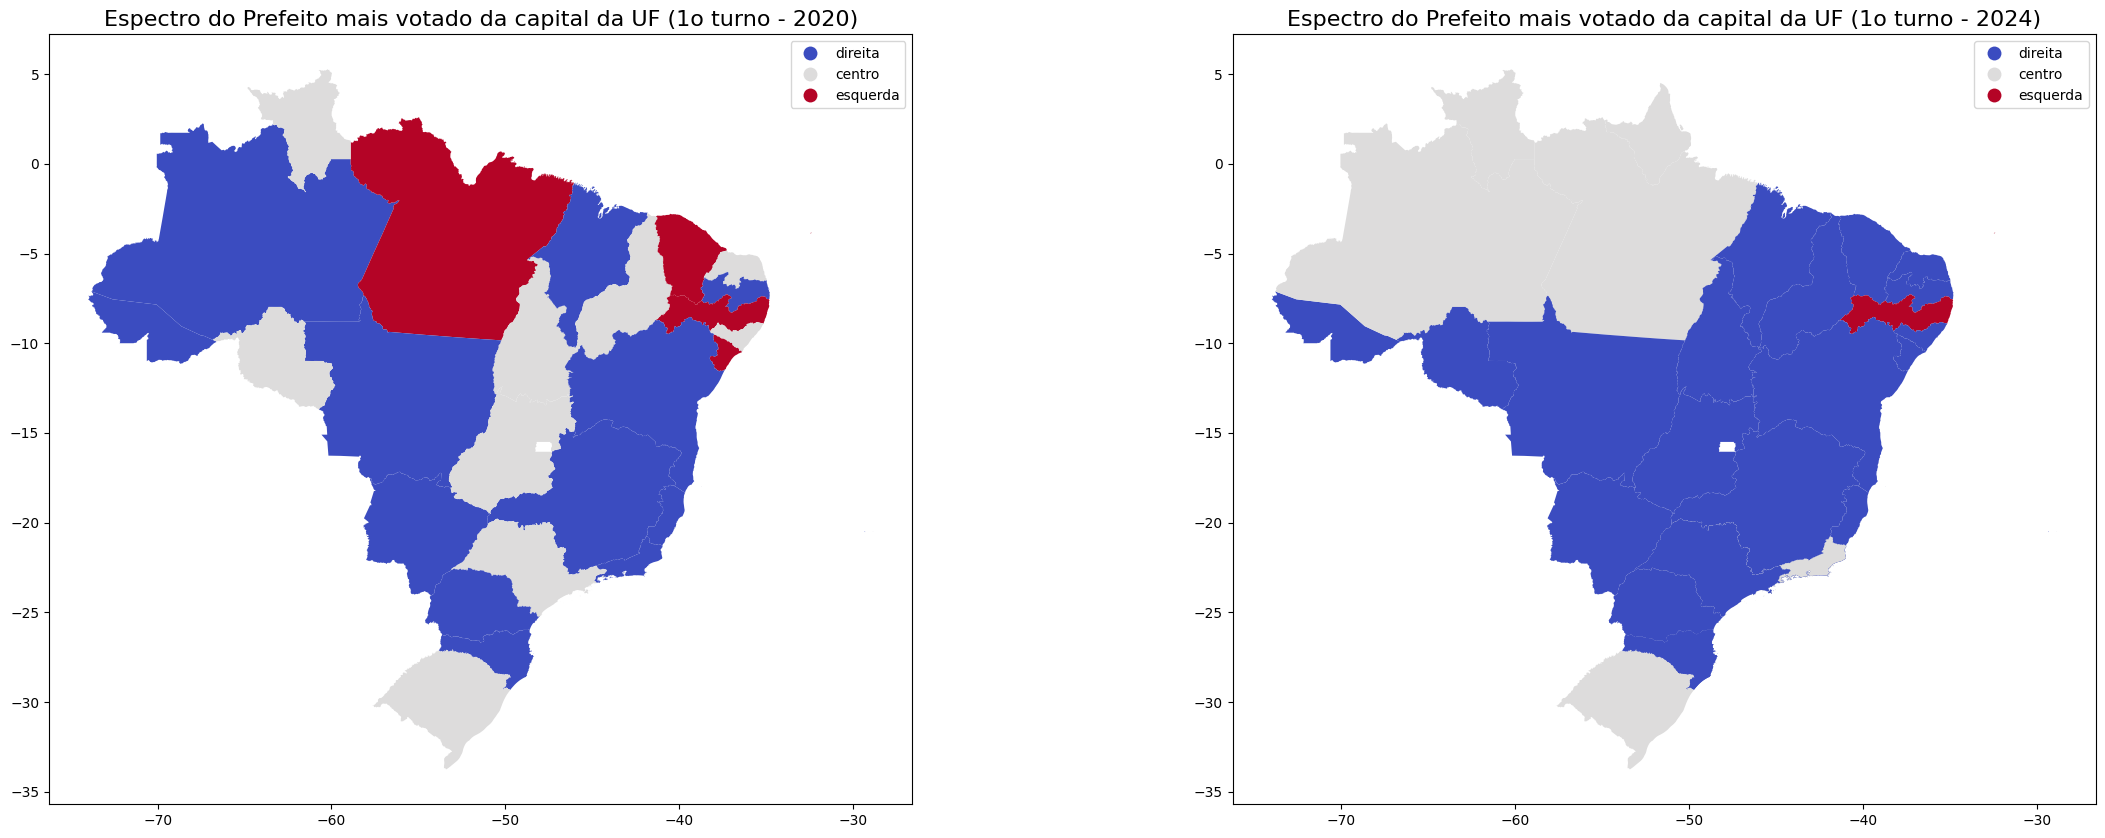

In [51]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro do Prefeito mais votado da capital da UF (1o turno - 2020)',size=16)
ax[1].set_title(f'Espectro do Prefeito mais votado da capital da UF (1o turno - 2024)',size=16)

candidatos_mais_votados_capitais_1turno_2020_geo_df .plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
candidatos_mais_votados_capitais_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])